<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Menyiapkan-library-yang-akan-digunakan-untuk-Data-Wranggling" data-toc-modified-id="Menyiapkan-library-yang-akan-digunakan-untuk-Data-Wranggling-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Menyiapkan library yang akan digunakan untuk Data Wranggling</a></span></li><li><span><a href="#Mengambil-data-pada-web-Monexnews.com" data-toc-modified-id="Mengambil-data-pada-web-Monexnews.com-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Mengambil data pada web Monexnews.com</a></span></li><li><span><a href="#Mengubah-data-menjadi-Phyton-Object-dan-Merapikan-data-yang-diambil" data-toc-modified-id="Mengubah-data-menjadi-Phyton-Object-dan-Merapikan-data-yang-diambil-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Mengubah data menjadi Phyton Object dan Merapikan data yang diambil</a></span></li><li><span><a href="#Mendapatkan-data-Kurs-Yen" data-toc-modified-id="Mendapatkan-data-Kurs-Yen-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Mendapatkan data Kurs Yen</a></span></li><li><span><a href="#Melakukan-scrapping-data" data-toc-modified-id="Melakukan-scrapping-data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Melakukan scrapping data</a></span></li><li><span><a href="#Memperbaiki-urutan-baris-yang-benar-sesuia-dengan-urutan-bulan-dalam-satu-tahun" data-toc-modified-id="Memperbaiki-urutan-baris-yang-benar-sesuia-dengan-urutan-bulan-dalam-satu-tahun-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Memperbaiki urutan baris yang benar sesuia dengan urutan bulan dalam satu tahun</a></span></li><li><span><a href="#Menyimpan-data-tuple-menjadi-pandas-dataframe" data-toc-modified-id="Menyimpan-data-tuple-menjadi-pandas-dataframe-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Menyimpan data tuple menjadi pandas dataframe</a></span></li><li><span><a href="#Melakukan-Data-Wranggling" data-toc-modified-id="Melakukan-Data-Wranggling-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Melakukan Data Wranggling</a></span><ul class="toc-item"><li><span><a href="#Mengkonversi-format-tanggal-menjadi-standar-format-tanggal-pada-Phyton" data-toc-modified-id="Mengkonversi-format-tanggal-menjadi-standar-format-tanggal-pada-Phyton-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Mengkonversi format tanggal menjadi standar format tanggal pada Phyton</a></span></li><li><span><a href="#Mengubah-koma-menjadi-titik-pada-kolom-Kurs_jual-dan-Kurs_beli-dan-format-data-menjadi-float" data-toc-modified-id="Mengubah-koma-menjadi-titik-pada-kolom-Kurs_jual-dan-Kurs_beli-dan-format-data-menjadi-float-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Mengubah koma menjadi titik pada kolom <code>Kurs_jual</code> dan <code>Kurs_beli</code> dan format data menjadi <code>float</code></a></span></li><li><span><a href="#Membuat-kolom-baru-periode-(bulan)" data-toc-modified-id="Membuat-kolom-baru-periode-(bulan)-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Membuat kolom baru <code>periode</code> (bulan)</a></span></li><li><span><a href="#Menjadikan-kolom-tanggal-sebagai-index" data-toc-modified-id="Menjadikan-kolom-tanggal-sebagai-index-8.4"><span class="toc-item-num">8.4&nbsp;&nbsp;</span>Menjadikan kolom <code>tanggal</code> sebagai index</a></span></li></ul></li><li><span><a href="#Membuat-grafik-Kurs-JPY-berdasarkan-Tanggal" data-toc-modified-id="Membuat-grafik-Kurs-JPY-berdasarkan-Tanggal-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Membuat grafik Kurs JPY berdasarkan Tanggal</a></span></li><li><span><a href="#Membuat-DataFrame-untuk-merepresentasikan-nilai-tukar-JPY-berdasarkan-periode-Bulan" data-toc-modified-id="Membuat-DataFrame-untuk-merepresentasikan-nilai-tukar-JPY-berdasarkan-periode-Bulan-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Membuat <code>DataFrame</code> untuk merepresentasikan nilai tukar JPY berdasarkan periode <code>Bulan</code></a></span></li><li><span><a href="#Analisis-Data" data-toc-modified-id="Analisis-Data-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Analisis Data</a></span></li></ul></div>

**Web Scrapping Data Kurs Yen terhadap Rupiah Tahun 2019**

#### Menyiapkan library yang akan digunakan untuk Data Wranggling
- import package yang akan digunakan pada requirements dimana semua package yang gunakan terdapat pada ria.txt
- pastikan install package yang sesuai dengan kebutuhan

In [1]:
from flask import Flask, render_template 
import pandas as pd
import requests
from bs4 import BeautifulSoup 
from io import BytesIO
import base64
import matplotlib.pyplot as plt
import dateparser

#### Mengambil data pada web Monexnews.com
- pengambilan data melalui web dengan menggunakan `requests.get` kemudian masukkan alamat url yang diinginkan
- gunakan `.content[1:_]` untuk menampilkan data yang diinginkan pada web 

In [2]:
# to get data from web (scrapping)
url_get = requests.get('https://monexnews.com/kurs-valuta-asing.htm?kurs=JPY&searchdatefrom=01-01-2019&searchdateto=31-12-2019')
url_get.content[1:]

b'!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml">\n<head>\n<meta http-equiv="Content-Language" content="en,in" />\n<link rel="alternate" href="https://news.mifx.com/kurs-valuta-asing.php" hreflang="en-ID" />\n<base href="https://news.mifx.com/" target="_self" />\n<title>Kurs Dollar | USD | Nilai Tukar Dollar Hari Ini</title>\n<meta property="og:title" content="Kurs Dollar | USD | Nilai Tukar Dollar Hari Ini" />\n<meta name="description" content="Nilai tukar rupiah terhadap dollar hari ini berdasarkan kurs tengah Bank Indonesia. " />\n<meta property="og:description" content="Nilai tukar rupiah terhadap dollar hari ini berdasarkan kurs tengah Bank Indonesia. " />\n<meta name="keywords" content="Broker Terbaik, Trading Forex, Trading Teregulasi, Trading Online, Monex, mifx," />\n<meta property="og:image" content="favicon.jpg?v=1570462055" />\n\n<meta name="author" content=

#### Mengubah data menjadi Phyton Object dan Merapikan data yang diambil
- menggunakan package Beautiful Soup diatas `from bs4 import BeautifulSoup` untuk menampilkan data yang kompleks pada web menjadi bentuk Phyton object yang mudah dimengerti
- untuk menampilkan data yang lebih rapi dan terstruktur pada jumlah karakter tertentu (disini dibatasi dengan melihat 1045 karakter pertama), digunakan `print(soup.prettify()[:1045]) 

In [4]:
# for tidyness purpose
soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))
print(soup.prettify()[:1045])

<class 'bs4.BeautifulSoup'>
<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <meta content="en,in" http-equiv="Content-Language"/>
  <link href="https://news.mifx.com/kurs-valuta-asing.php" hreflang="en-ID" rel="alternate"/>
  <base href="https://news.mifx.com/" target="_self"/>
  <title>
   Kurs Dollar | USD | Nilai Tukar Dollar Hari Ini
  </title>
  <meta content="Kurs Dollar | USD | Nilai Tukar Dollar Hari Ini" property="og:title"/>
  <meta content="Nilai tukar rupiah terhadap dollar hari ini berdasarkan kurs tengah Bank Indonesia. " name="description"/>
  <meta content="Nilai tukar rupiah terhadap dollar hari ini berdasarkan kurs tengah Bank Indonesia. " property="og:description"/>
  <meta content="Broker Terbaik, Trading Forex, Trading Teregulasi, Trading Online, Monex, mifx," name="keywords"/>
  <meta content="favicon.jpg?v=1570462055" property="og:image"

#### Mendapatkan data Kurs Yen 
- dalam hal ini data yang akan diinspeksi dan diambil adalah data Kurs Yen terhadap Rupiah di tahun 2019 dimana untuk mendapatkan data tersebut adalah dengan melihat/menginspeksi jenis dari atribut atau kelas dengan menngunakan `soup.find('table', attrs={'class':'__'}) diisi dengan jenis atau kelas tabel pada data Kurs Yen tersebut

In [5]:
#Find the key to get the information
table = soup.find('table', attrs={'class':'centerText newsTable2'})
print(table.prettify()[1:1000])

table cellpadding="10" cellspacing="0" class="centerText newsTable2" width="100%">
 <tr class="colorWhite fontsize14 firstRow">
  <td>
   TANGGAL
  </td>
  <td>
   ASK
  </td>
  <td>
   BID
  </td>
 </tr>
 <tr class="verySoftGreyBg">
  <td>
   31 Desember 2019
  </td>
  <td>
   128,62
  </td>
  <td>
   127,32
  </td>
 </tr>
 <tr>
  <td>
   30 Desember 2019
  </td>
  <td>
   128,30
  </td>
  <td>
   127,02
  </td>
 </tr>
 <tr class="verySoftGreyBg">
  <td>
   27 Desember 2019
  </td>
  <td>
   128,11
  </td>
  <td>
   126,83
  </td>
 </tr>
 <tr>
  <td>
   26 Desember 2019
  </td>
  <td>
   128,27
  </td>
  <td>
   126,98
  </td>
 </tr>
 <tr class="verySoftGreyBg">
  <td>
   23 Desember 2019
  </td>
  <td>
   128,39
  </td>
  <td>
   127,10
  </td>
 </tr>
 <tr>
  <td>
   20 Desember 2019
  </td>
  <td>
   128,63
  </td>
  <td>
   127,34
  </td>
 </tr>
 <tr class="verySoftGreyBg">
  <td>
   19 Desember 2019
  </td>
  <td>
   128,24
  </td>
  <td>
   126,93
  </td>
 </tr>
 <tr>
  <td>
   


- Seperti yang dapat dilihat dari hasil diatas, informasi tersebut adalah informasi yang diinginkan (masih dalam bentuk HTML)
- untuk mendapatkan hanya data yang berada dalam tabel saja (tr dan td) maka perlu memanggil data tersebut menggunakan `.find_all('tr/td')`

In [6]:
tr = table.find_all('tr')
tr[:] #call founded tr

[<tr class="colorWhite fontsize14 firstRow">
 <td>TANGGAL</td>
 <td>ASK</td>
 <td>BID</td>
 </tr>, <tr class="verySoftGreyBg">
 <td>31 Desember 2019</td>
 <td>128,62</td>
 <td>127,32</td>
 </tr>, <tr>
 <td>30 Desember 2019</td>
 <td>128,30</td>
 <td>127,02</td>
 </tr>, <tr class="verySoftGreyBg">
 <td>27 Desember 2019</td>
 <td>128,11</td>
 <td>126,83</td>
 </tr>, <tr>
 <td>26 Desember 2019</td>
 <td>128,27</td>
 <td>126,98</td>
 </tr>, <tr class="verySoftGreyBg">
 <td>23 Desember 2019</td>
 <td>128,39</td>
 <td>127,10</td>
 </tr>, <tr>
 <td>20 Desember 2019</td>
 <td>128,63</td>
 <td>127,34</td>
 </tr>, <tr class="verySoftGreyBg">
 <td>19 Desember 2019</td>
 <td>128,24</td>
 <td>126,93</td>
 </tr>, <tr>
 <td>18 Desember 2019</td>
 <td>128,64</td>
 <td>127,32</td>
 </tr>, <tr class="verySoftGreyBg">
 <td>17 Desember 2019</td>
 <td>128,62</td>
 <td>127,33</td>
 </tr>, <tr>
 <td>16 Desember 2019</td>
 <td>128,67</td>
 <td>127,36</td>
 </tr>, <tr class="verySoftGreyBg">
 <td>13 Desember 2

#### Melakukan scrapping data
- Pertama, perlu membentuk placeholder untuk menerima informasi yang kami memo dan menamainya dengan temp yang merupakan metode untuk mendapatkan tuple.
- Kemudian membuat loop dari satu sampai panjang baris tabel yang ditemukan di semua sel kolom satu, dua dan tiga yang berisi Tanggal, Kurs Jual dan Kurs Beli.
- Kemudian kita akan menambahkannya ke tuple yang telah kita siapkan sebelumnya, setiap satu iterasi kita akan memo satu baris tabel.

In [23]:
temp = [] #initiating a tuple

for i in range(1, len (tr)):
    row = table.find_all('tr')[i]
        
    #get periode
    Tanggal = row.find_all('td')[0].text
    Tanggal = Tanggal.strip()
    Tanggal = Tanggal.replace(u'\xa0', u' ') #for removing the excess whitespace 
    
    #get ASK
    Kurs_jual = row.find_all('td')[1].text
    Kurs_jual = Kurs_jual.strip() #for removing the excess whitespace
    
    #get BID
    Kurs_beli = row.find_all('td')[2].text
    Kurs_beli = Kurs_beli.strip() #for removing the excess whitespace

    temp.append((Tanggal,Kurs_jual,Kurs_beli))
temp

[('31 Desember 2019', '128,62', '127,32'),
 ('30 Desember 2019', '128,30', '127,02'),
 ('27 Desember 2019', '128,11', '126,83'),
 ('26 Desember 2019', '128,27', '126,98'),
 ('23 Desember 2019', '128,39', '127,10'),
 ('20 Desember 2019', '128,63', '127,34'),
 ('19 Desember 2019', '128,24', '126,93'),
 ('18 Desember 2019', '128,64', '127,32'),
 ('17 Desember 2019', '128,62', '127,33'),
 ('16 Desember 2019', '128,67', '127,36'),
 ('13 Desember 2019', '128,30', '127,02'),
 ('12 Desember 2019', '130,04', '128,71'),
 ('11 Desember 2019', '129,65', '128,34'),
 ('10 Desember 2019', '129,56', '128,26'),
 ('09 Desember 2019', '129,76', '128,44'),
 ('06 Desember 2019', '129,78', '128,45'),
 ('05 Desember 2019', '130,10', '128,77'),
 ('04 Desember 2019', '130,79', '129,45'),
 ('03 Desember 2019', '130,15', '128,82'),
 ('02 Desember 2019', '129,36', '128,04'),
 ('29 November 2019', '129,44', '128,12'),
 ('28 November 2019', '129,47', '128,15'),
 ('27 November 2019', '129,84', '128,53'),
 ('26 Novem

#### Memperbaiki urutan baris yang benar sesuia dengan urutan bulan dalam satu tahun
- data yang didapatkan masih terbalik urutannya, sehingga untuk membuat data menjadi rapi dan urut sesuai dengan urutan bulan yang benar maka digunakan ::-1

In [24]:
#remove the header
temp = temp[::-1]
temp

[('02 Januari 2019', '132,89', '131,54'),
 ('03 Januari 2019', '135,44', '134,08'),
 ('04 Januari 2019', '133,51', '132,17'),
 ('07 Januari 2019', '130,86', '129,51'),
 ('08 Januari 2019', '129,84', '128,52'),
 ('09 Januari 2019', '130,31', '129,00'),
 ('10 Januari 2019', '131,22', '129,88'),
 ('11 Januari 2019', '130,62', '129,31'),
 ('14 Januari 2019', '130,52', '129,19'),
 ('15 Januari 2019', '130,56', '129,23'),
 ('16 Januari 2019', '131,11', '129,75'),
 ('17 Januari 2019', '130,61', '129,27'),
 ('18 Januari 2019', '130,37', '129,03'),
 ('21 Januari 2019', '130,31', '128,98'),
 ('22 Januari 2019', '130,39', '129,07'),
 ('23 Januari 2019', '130,05', '128,75'),
 ('24 Januari 2019', '129,79', '128,48'),
 ('25 Januari 2019', '129,68', '128,37'),
 ('28 Januari 2019', '128,97', '127,65'),
 ('29 Januari 2019', '129,74', '128,43'),
 ('30 Januari 2019', '129,79', '128,47'),
 ('31 Januari 2019', '129,92', '128,60'),
 ('01 Februari 2019', '129,05', '127,75'),
 ('04 Februari 2019', '128,24', '

#### Menyimpan data tuple menjadi pandas dataframe
- diatas kita telah menginstall pandas yang tujuan nya untuk menampilkan data yang telah discrapping menjadi dataframe Pandas yaitu dengan menggunakan `pd.DataFrame(temp, columns = ('__','__','__'))` yang diisi dengan kolom-kolom yang telah discrapping yaitu Tanggal, Kurs Jual dan Kurs Beli.

In [25]:
#creating the dataframe
kurs = pd.DataFrame(temp, columns = ('Tanggal','Kurs_jual','Kurs_beli'))
kurs.head()

,Tanggal,Kurs_jual,Kurs_beli
0,02 Januari 2019,"132,89","131,54"
1,03 Januari 2019,"135,44","134,08"
2,04 Januari 2019,"133,51","132,17"
3,07 Januari 2019,"130,86","129,51"
4,08 Januari 2019,"129,84","128,52"


#### Melakukan Data Wranggling
Data yang telah diambil kemudian disesuaikan formatnya sesuai dengan yang seharusnya

##### Mengkonversi format tanggal menjadi standar format tanggal pada Phyton
- seperti diketahui bahwa format penulisan tanggal pada data menggunakan bahasa indonesia sehingga sebelum diubah tipe data nya menjadi `datetime` maka harus dikonversi terlebih dahulu menyesuaikan standar format Phyton dengan menginstall `dateparser`
- kemudian menggunakan fungsi `.apply(lambda :x, dateparser(x))` untuk mengubah data pada kolom `Tanggal` secara keseluruhan

In [26]:
#data wranggling -  try to change the data type to right data type
# convert period to standard format in phyton
dateparser.parse('02 Januari 2020')

kurs['Tanggal'] = kurs['Tanggal'].apply(lambda x: dateparser.parse(x))

##### Mengubah koma menjadi titik pada kolom `Kurs_jual` dan `Kurs_beli` dan format data menjadi `float`
- mengubah koma menjadi titik menggunakan `.str.replace(',', '.')`
- mengubah data `Kurs_jual` dan `Kurs_beli` menjadi floating dengan menggunakan `.astype('float64')`

In [27]:
# change coma with dot to make data type floating
kurs['Kurs_jual'] = kurs['Kurs_jual'].str.replace("," , ".",regex = True)
kurs['Kurs_beli'] = kurs['Kurs_beli'].str.replace("," , ".",regex = True)

#convert data type
kurs[['Kurs_jual', 'Kurs_beli']] = kurs[['Kurs_jual', 'Kurs_beli']].astype('float64')
kurs.dtypes

Tanggal      datetime64[ns]
Kurs_jual           float64
Kurs_beli           float64
dtype: object

In [28]:
kurs.head()

,Tanggal,Kurs_jual,Kurs_beli
0,2019-01-02,132.89,131.54
1,2019-01-03,135.44,134.08
2,2019-01-04,133.51,132.17
3,2019-01-07,130.86,129.51
4,2019-01-08,129.84,128.52


##### Membuat kolom baru `periode` (bulan)
- Menggunakan `.dt.to_period('M')` untuk mendapatkan periode bulan dari kolom `tanggal`
- Tujuannya untuk mendapatkan analisis data yang lebih informatif

In [29]:
kurs['periode'] = kurs['Tanggal'].dt.to_period('M')
kurs.head()

,Tanggal,Kurs_jual,Kurs_beli,periode
0,2019-01-02,132.89,131.54,2019-01
1,2019-01-03,135.44,134.08,2019-01
2,2019-01-04,133.51,132.17,2019-01
3,2019-01-07,130.86,129.51,2019-01
4,2019-01-08,129.84,128.52,2019-01


##### Menjadikan kolom `tanggal` sebagai index
- Untuk menghasilkan grafik nilai tukar JPY (y-axis) berdasarkan `tanggal` (x-axis)

In [33]:
kurs1 = kurs.set_index("Tanggal")

In [34]:
kurs1.head()

,Kurs_jual,Kurs_beli,periode
Tanggal,,,
2019-01-02,132.89,131.54,2019-01
2019-01-03,135.44,134.08,2019-01
2019-01-04,133.51,132.17,2019-01
2019-01-07,130.86,129.51,2019-01
2019-01-08,129.84,128.52,2019-01


#### Membuat grafik Kurs JPY berdasarkan Tanggal
- menggunakan `.plot()` untuk membuat grafik garis

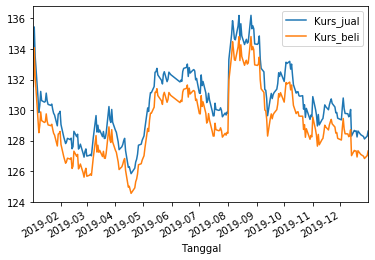

In [35]:
kurs1.plot()

#### Membuat `DataFrame` untuk merepresentasikan nilai tukar JPY berdasarkan periode `Bulan`
- Tujuannya agar grafik lebih mudah dibaca dan menghasilkan analisis yang lebih berarti
- Menggunakan `.groupby` untuk mengelompokkan nilai kurs JPY berdasarkan kolom periode yang berisikan bulan
- Hasil pengelompokan tersebut selanjutnya digunakan untuk mengambil nilai rata-rata untuk nilai tukar JPY pada `periode` bulan tertentu

In [40]:
kurs2 = kurs.groupby('periode').mean().round(2)
kurs2

,Kurs_jual,Kurs_beli
periode,,
2019-01,130.75,129.42
2019-02,127.86,126.57
2019-03,128.52,127.22
2019-04,127.37,126.07
2019-05,131.47,130.14
2019-06,132.40,131.05
2019-07,130.46,129.13
2019-08,134.74,133.37
2019-09,132.01,130.66


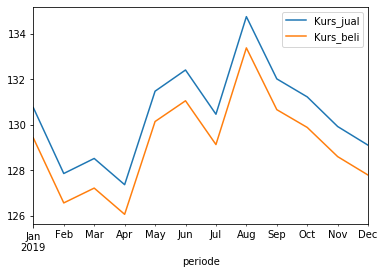

In [39]:
kurs2.plot()

#### Analisis Data

Dari hasil scrapping data Kurs Yen to IDR Tahun 2019 diketahui bahwa Kurs menempati posisi terendah pada awal Bulan April 2019 yaitu dengan rata-rata Kurs Jual adalah 127.37 dan Kurs Beli adalah 126.07.

Sedangkan kurs menempati posisi tertinggi pada Bulan Agustus 2019 dengan perolehan nilai yaitu rata-rata Kurs Jual adalah 134.34 dan Kurs Beli adalah 133.37.

Terdapat beberapa hal yang dapat mempengaruhi kondisi tersebut yaitu:
1. penurunan kurs JPY pada bulan April 2019 salah satunya karena dipicu oleh tumbuhnya minat risiko di kalangan pelaku pasar. Kenaikan Risk Appetite ini disebabkan oleh munculnya tanda-tanda perbaikan ekonomi China dan pendapatan perusahaan AS yang melonjak

https://www.seputarforex.com/berita/minat-risiko-naik-yen-turun-ke-level-terendah-2019-288132-11

2. sedangkan peningkatan kurs JPY pada bulan Agustus 2019 dikarenakan dengan meningkatnya kenaikan harga emas di pasar global dan menguatnya Pasar yang telah diawali dengan penguatan kurs mulai pertengahan April 2019 sebelum masa Golden Week

https://investasi.kontan.co.id/news/yen-tengah-perkasa-pasangan-kurs-usdjpy-direkomendasikan-jual